In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
dataframe = pd.read_csv("Zomato data .csv")
print(dataframe.head())


                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [5]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

dataframe['rate'] = dataframe['rate'].apply(handleRate)
print(dataframe.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [4]:
dataframe.info()
#There is no NULL value in dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


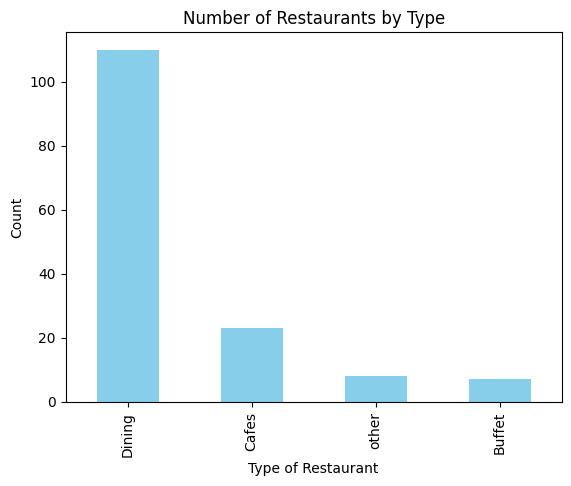

In [6]:
type_counts = dataframe['listed_in(type)'].value_counts()
type_counts.plot(kind='bar', color='skyblue')
plt.title("Number of Restaurants by Type")
plt.xlabel("Type of Restaurant")
plt.ylabel("Count")
plt.show()


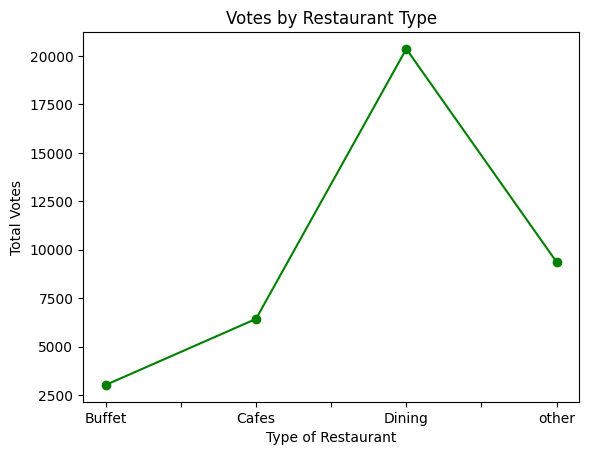

In [7]:
grouped_votes = dataframe.groupby('listed_in(type)')['votes'].sum()
grouped_votes.plot(kind='line', marker='o', color='green')
plt.title("Votes by Restaurant Type")
plt.xlabel("Type of Restaurant")
plt.ylabel("Total Votes")
plt.show()


In [8]:
max_votes = dataframe['votes'].max()
top_restaurant = dataframe[dataframe['votes'] == max_votes]['name'].iloc[0]
print(f"Restaurant with Maximum Votes: {top_restaurant}")


Restaurant with Maximum Votes: Empire Restaurant


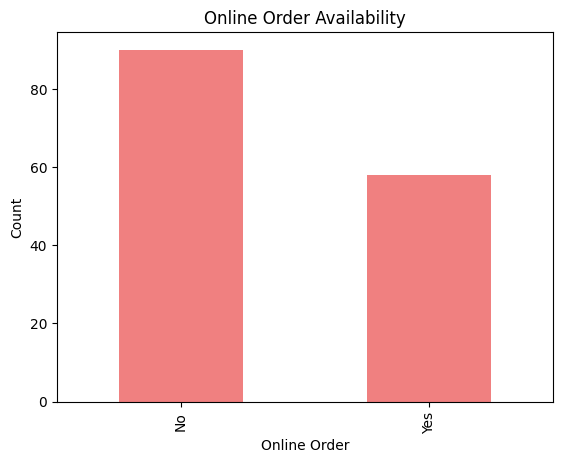

In [9]:
online_counts = dataframe['online_order'].value_counts()
online_counts.plot(kind='bar', color='lightcoral')
plt.title("Online Order Availability")
plt.xlabel("Online Order")
plt.ylabel("Count")
plt.show()


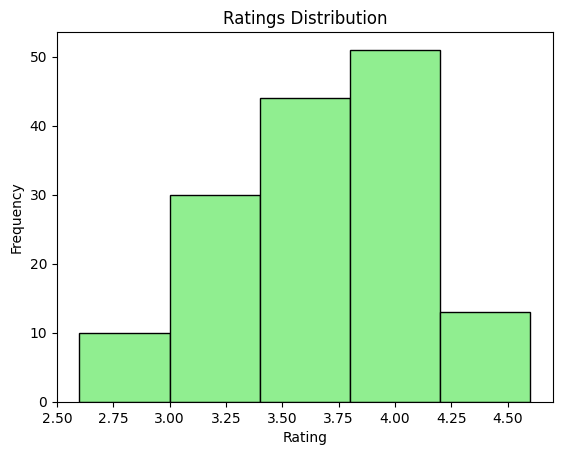

In [10]:
plt.hist(dataframe['rate'], bins=5, color='lightgreen', edgecolor='black')
plt.title("Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


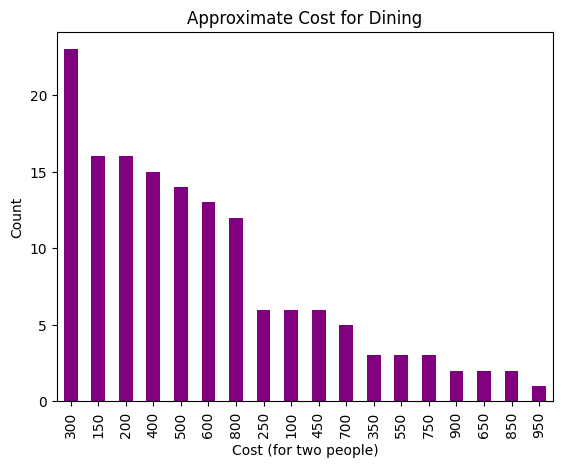

In [11]:
cost_counts = dataframe['approx_cost(for two people)'].value_counts()
cost_counts.plot(kind='bar', color='purple')
plt.title("Approximate Cost for Dining")
plt.xlabel("Cost (for two people)")
plt.ylabel("Count")
plt.show()


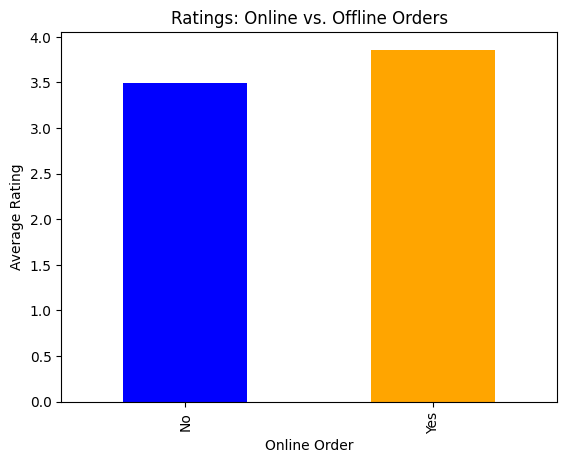

In [12]:
dataframe.groupby('online_order')['rate'].mean().plot(kind='bar', color=['blue', 'orange'])
plt.title("Ratings: Online vs. Offline Orders")
plt.xlabel("Online Order")
plt.ylabel("Average Rating")
plt.show()
